In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Read dataset

In [2]:
training_data=pd.read_csv("/kaggle/input/titanic/train.csv")
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Check missing values
print("training dataset:\n",training_data.isnull().sum())  # Counts missing values in each column
print("\n\ntest dataset:\n",test_data.isnull().sum())  # Counts missing values in each column

training dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


test dataset:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
# Check percentage of missing values
missing_percent_train = training_data.isnull().sum() / len(training_data) * 100
print("train data:\n",missing_percent_train)
missing_percent_test = test_data.isnull().sum() / len(test_data) * 100
print("\n\ntest data:\n",missing_percent_test)

train data:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


test data:
 PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


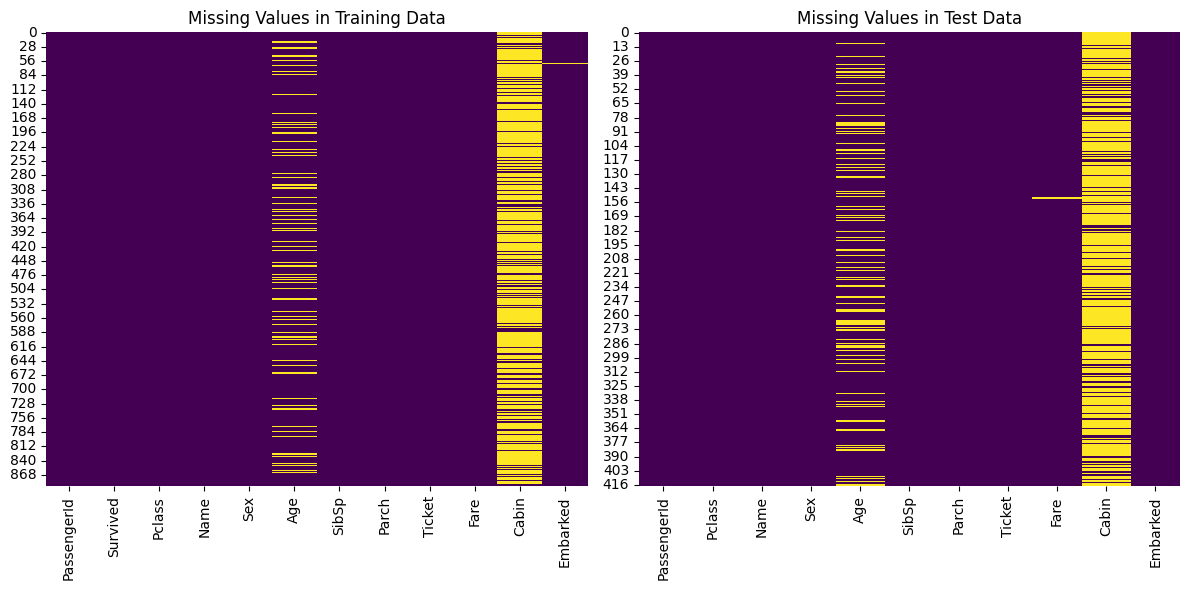

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Training Data Missing Values
sns.heatmap(training_data.isnull(), cbar=False, cmap="viridis", ax=axes[0])
axes[0].set_title("Missing Values in Training Data")

# Test Data Missing Values
sns.heatmap(test_data.isnull(), cbar=False, cmap="viridis", ax=axes[1])
axes[1].set_title("Missing Values in Test Data")

# Adjust layout
plt.tight_layout()
plt.show()


## data cleaning

In [7]:
training_data = training_data.drop(["Name", "Ticket", "PassengerId"], axis=1) # obviously, not relevant in common sense
training_data = training_data.drop("Cabin", axis=1) # because too many lost
training_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
test_data_id = test_data.PassengerId
test_data = test_data.drop(["Name", "Ticket", "PassengerId"], axis=1) # obviously, not relevant in common sense
test_data = test_data.drop("Cabin", axis=1) # because too many lost
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [9]:
training_data["Age"].fillna(training_data["Age"].median()) # Fill missing 'Age' with the median 
test_data["Age"].fillna(test_data["Age"].median()) 

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [10]:
training_data["Sex"] = training_data["Sex"].map({"male": 0, "female": 1})
training_data["Embarked"] = training_data["Embarked"].map({"C": 0, "Q": 1, "S":2})
training_data["Embarked"] = training_data["Embarked"].fillna(training_data["Embarked"].mode()[0])# Fill missing 'Embarked' with the most common value  
training_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0


In [11]:
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})
test_data["Embarked"] = test_data["Embarked"].map({"C": 0, "Q": 1, "S":2})
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())# Fill missing 'Fare' with the median
training_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0


## Feature selection

Survived    1.000000
Sex         0.543351
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Embarked   -0.167675
Pclass     -0.338481
Name: Survived, dtype: float64


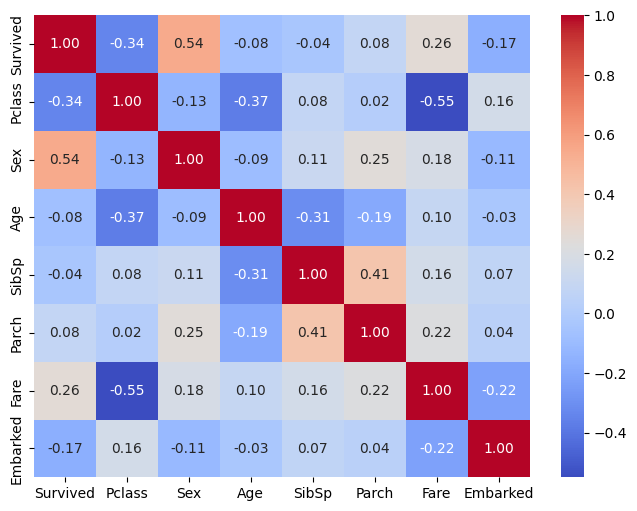

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = training_data.corr()

# Show correlation with the target variable
print(correlation_matrix["Survived"].sort_values(ascending=False))

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


## Model Training

In [13]:
from sklearn.ensemble import RandomForestClassifier

y = training_data["Survived"]

features = ["Sex", "Pclass", "Fare", "Embarked"]
X = training_data[features]
X_test = test_data[features]

In [14]:
print("training dataset:\n",X.isnull().sum())  # Counts missing values in each column

training dataset:
 Sex         0
Pclass      0
Fare        0
Embarked    0
dtype: int64


In [15]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

RandomForestClassifier(max_depth=5, random_state=1)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
predictions_from_train_data = model.predict(X)

# Accuracy Score
accuracy = accuracy_score(y, predictions_from_train_data)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y, predictions_from_train_data))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y, predictions_from_train_data))

Accuracy: 0.8384
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       549
           1       0.90      0.65      0.76       342

    accuracy                           0.84       891
   macro avg       0.86      0.80      0.82       891
weighted avg       0.85      0.84      0.83       891

Confusion Matrix:
[[525  24]
 [120 222]]


In [17]:
model2 = RandomForestClassifier(n_estimators=200, max_features='sqrt', random_state=1)
model2.fit(X, y)
# Predict on test data
predictions_from_train_data = model2.predict(X)

# Accuracy Score
accuracy = accuracy_score(y, predictions_from_train_data)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y, predictions_from_train_data))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y, predictions_from_train_data))

Accuracy: 0.9091
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       549
           1       0.93      0.83      0.87       342

    accuracy                           0.91       891
   macro avg       0.91      0.89      0.90       891
weighted avg       0.91      0.91      0.91       891

Confusion Matrix:
[[527  22]
 [ 59 283]]


In [18]:
predictions = model2.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data_id , 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
